In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from IPython.display import display
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats import ttest_ind

In [247]:
import warnings
warnings.filterwarnings('ignore')

In [248]:
# import the NLSY97 dataset
nlsy= pd.read_csv('nlsy1260project2.csv', encoding = "ISO-8859-1")

In [249]:
nlsy.head(10)
#column name 12 = Age 12 BMI
#column name 13 = Age 13 BMI
#NO age 32 BMI in the original dataset
#....

,ID,Sex,Race,12,13,14,15,16,17,18,...,23,24,25,26,27,28,29,30,31,33
0,1,2,3.0,NaN,22.71,23.49,23.49,24.33,25.53,24.28,...,24.43,25.06,24.75,23.81,24.28,23.81,27.41,NaN,NaN,NaN
1,2,1,2.0,NaN,NaN,21.14,22.15,21.93,24.21,24.75,...,NaN,NaN,27.41,28.35,29.60,27.41,28.19,35.24,NaN,NaN
2,3,2,2.0,NaN,NaN,NaN,NaN,17.16,15.66,17.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2,2.0,NaN,35.14,34.75,33.84,33.84,36.58,43.16,...,51.21,26.45,32.01,30.23,32.12,37.79,35.90,NaN,NaN,NaN
4,5,1,2.0,NaN,NaN,22.46,23.17,23.40,22.60,27.44,...,27.44,29.05,26.63,29.86,28.73,29.05,30.67,28.73,NaN,NaN
5,6,2,2.0,NaN,NaN,25.96,23.52,25.61,25.75,25.75,...,27.46,30.90,33.30,29.18,NaN,NaN,NaN,NaN,NaN,NaN
6,7,1,2.0,NaN,NaN,NaN,28.58,28.74,27.02,30.27,...,39.13,34.56,NaN,NaN,43.33,43.33,NaN,NaN,NaN,NaN
7,8,2,3.0,NaN,20.53,20.53,21.29,22.81,20.53,21.93,...,21.29,NaN,22.81,NaN,23.49,NaN,24.75,NaN,NaN,NaN
8,9,1,3.0,NaN,NaN,23.63,22.24,24.41,25.10,26.50,...,26.50,26.50,25.80,25.10,26.50,27.20,27.89,26.50,NaN,NaN
9,10,1,3.0,NaN,NaN,NaN,NaN,15.55,15.94,17.43,...,18.99,19.53,18.99,18.31,18.99,18.99,NaN,NaN,NaN,NaN


In [250]:
# check the data type
nlsy.dtypes

ID        int64
Sex       int64
Race    float64
12      float64
13      float64
14      float64
15      float64
16      float64
17      float64
18      float64
19      float64
20      float64
21      float64
22      float64
23      float64
24      float64
25      float64
26      float64
27      float64
28      float64
29      float64
30      float64
31      float64
33      float64
dtype: object

In [251]:
pd.crosstab(index=nlsy["Sex"], columns="count")

col_0,count
Sex,
1,4599
2,4385


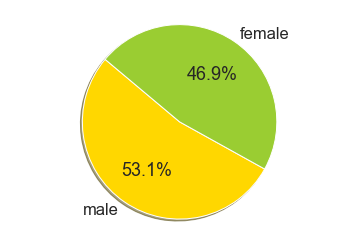

In [252]:
#descriptive pie chart for Sex
pd.crosstab(index=nlsy["Sex"], columns="count")
labels = 'male', 'female'
sizes = [4955, 4385]
colors = ['gold', 'yellowgreen']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [253]:
pd.crosstab(index=nlsy["Race"],columns="count")

col_0,count
Race,
1.0,2335
2.0,1901
3.0,4665


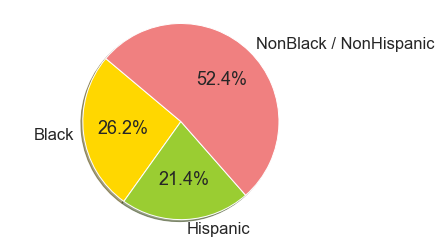

In [254]:
#descriptive pie chart for Race
pd.crosstab(index=nlsy["Race"],columns="count")
labels = 'Black', 'Hispanic', 'NonBlack / NonHispanic'
sizes = [2335, 1901,4665]
colors = ['gold', 'yellowgreen', 'lightcoral']
#explode = (0, 0, 0.1) 
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [255]:
#subset of original dataset
df = nlsy.loc[:, '12':'33']

In [256]:
#descriptive statistics 
df.describe()

,12,13,14,15,16,17,18,19,20,21,...,23,24,25,26,27,28,29,30,31,33
count,1511.000000,3185.000000,4760.000000,6236.000000,7699.000000,7696.000000,7534.000000,7410.000000,7278.000000,7178.000000,...,7173.000000,7205.000000,7199.000000,7178.000000,7033.000000,6885.000000,5531.000000,4071.000000,2609.000000,1307.000000
mean,23.097856,23.214998,23.205811,23.343283,23.310874,23.882876,24.465603,24.968709,25.445229,25.920876,...,26.694284,26.972477,27.429464,27.633612,27.899909,28.153933,28.282171,28.293596,28.600376,28.692578
std,4.337658,4.525158,4.520773,4.727439,4.951130,5.059029,5.359677,5.531444,5.650077,5.899951,...,6.140841,6.154729,6.417074,6.443795,6.511113,6.664542,6.795820,6.767194,6.901311,6.979236
min,13.730000,13.820000,12.200000,12.800000,12.280000,12.630000,12.440000,12.020000,12.050000,12.500000,...,14.640000,12.020000,12.550000,14.250000,14.080000,12.150000,12.130000,12.190000,14.730000,15.660000
25%,20.220000,20.120000,20.180000,20.180000,19.970000,20.360000,20.810000,21.140000,21.520000,21.790000,...,22.320000,22.600000,22.860000,23.035000,23.240000,23.490000,23.570000,23.490000,23.690000,23.735000
50%,22.140000,22.160000,22.150000,22.310000,22.310000,22.710000,23.115000,23.670000,24.130000,24.505000,...,25.110000,25.750000,25.990000,26.450000,26.570000,26.630000,26.780000,26.790000,27.260000,27.270000
75%,24.690000,25.090000,25.100000,25.390000,25.420000,26.040000,26.630000,27.410000,28.060000,28.700000,...,29.680000,29.950000,30.470000,30.790000,31.170000,31.380000,31.395000,31.590000,32.100000,31.880000
max,53.260000,56.580000,56.580000,58.240000,58.430000,59.300000,57.570000,58.050000,58.240000,58.590000,...,59.910000,58.860000,59.070000,59.070000,59.270000,58.240000,59.520000,59.320000,59.750000,58.390000


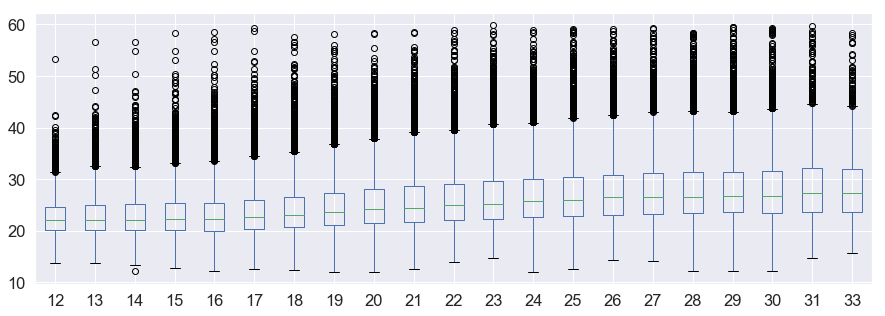

In [257]:
df.boxplot(figsize=(15,5))

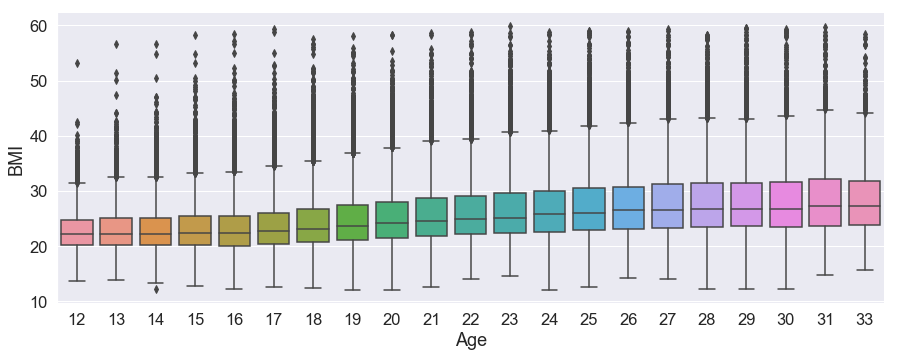

In [258]:
#another boxplot
sns.set(font_scale=1.5)
ax=sns.catplot(kind='box',data=df,height=5, aspect=2.5)
ax.set(xlabel='Age', ylabel='BMI')

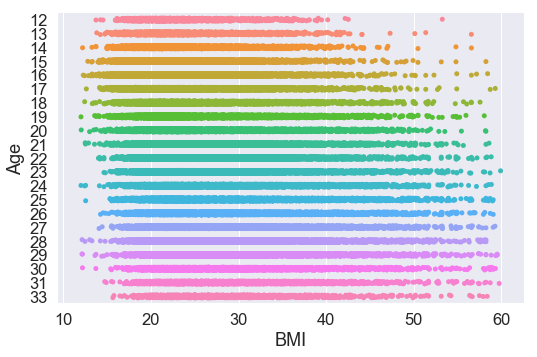

In [259]:
#Range of BMI from age 12 to age 33
ax=sns.catplot(data=df,orient="h", height=5, aspect=1.5)
ax.set(xlabel='BMI', ylabel='Age')

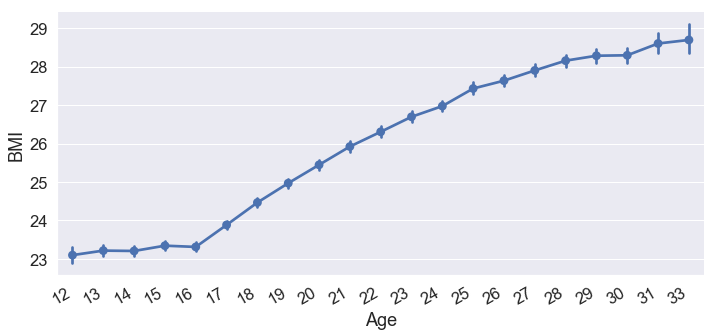

In [260]:
#overall BMI trend
ax = sns.catplot(kind='point',data=df, height=5, aspect=2)
ax.fig.autofmt_xdate()
ax.set(xlabel='Age', ylabel='BMI')

In [261]:
# reshape wide form to long form
dflong=melted = pd.melt(nlsy, id_vars=['ID', 'Sex', 'Race'],var_name='Age', value_vars=['12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','33'], value_name='BMI')

dflong['Sex'][dflong['Sex']==1] = 'Male'

dflong['Sex'][dflong['Sex']==2] = 'Female'

dflong['Race'][dflong['Race']==1] = 'Black'

dflong['Race'][dflong['Race']==2] = 'Hispanic'

dflong['Race'][dflong['Race']==3] = 'NonBlack/NonHispanic'

print(dflong)

          ID     Sex                  Race Age    BMI
0          1  Female  NonBlack/NonHispanic  12    NaN
1          2    Male              Hispanic  12    NaN
2          3  Female              Hispanic  12    NaN
3          4  Female              Hispanic  12    NaN
4          5    Male              Hispanic  12    NaN
5          6  Female              Hispanic  12    NaN
6          7    Male              Hispanic  12    NaN
7          8  Female  NonBlack/NonHispanic  12    NaN
8          9    Male  NonBlack/NonHispanic  12    NaN
9         10    Male  NonBlack/NonHispanic  12    NaN
10        11  Female              Hispanic  12    NaN
11        12    Male              Hispanic  12    NaN
12        13    Male              Hispanic  12    NaN
13        14    Male              Hispanic  12  23.49
14        15  Female              Hispanic  12    NaN
15        16    Male              Hispanic  12    NaN
16        17  Female              Hispanic  12    NaN
17        18    Male        

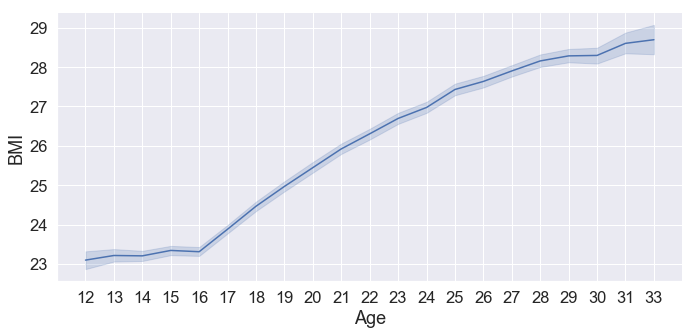

In [262]:
#another plot to show the overall BMI trend
age_vs_hours_per_week = sns.relplot(x="Age", y="BMI", kind="line",height=5, aspect=2, data=dflong)

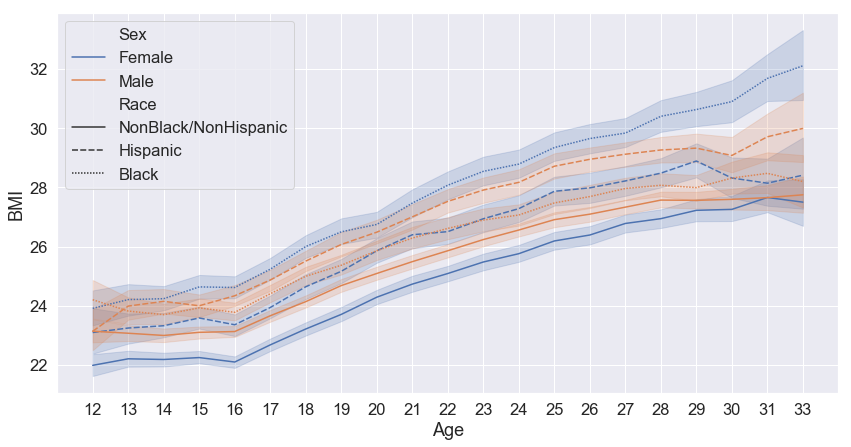

In [263]:
# subgroups of BMI trend
plt.subplots(figsize=(14,7))
sns.lineplot(x="Age", y="BMI",
             hue="Sex", style="Race",
             data=dflong)

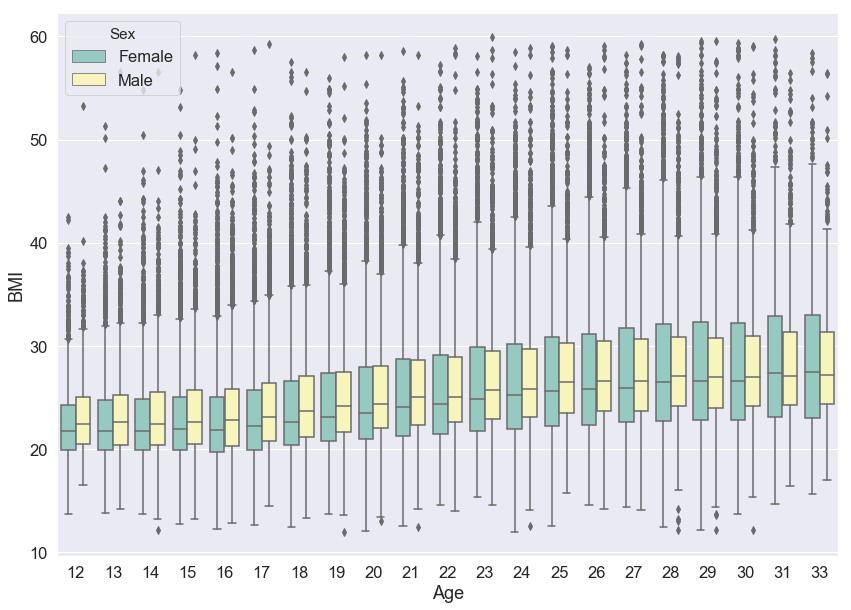

In [264]:
#Gender differences in the trends of BMI increase
plt.subplots(figsize=(14,10))
ax = sns.boxplot(x="Age", y="BMI", hue="Sex",
               data=dflong, palette="Set3")

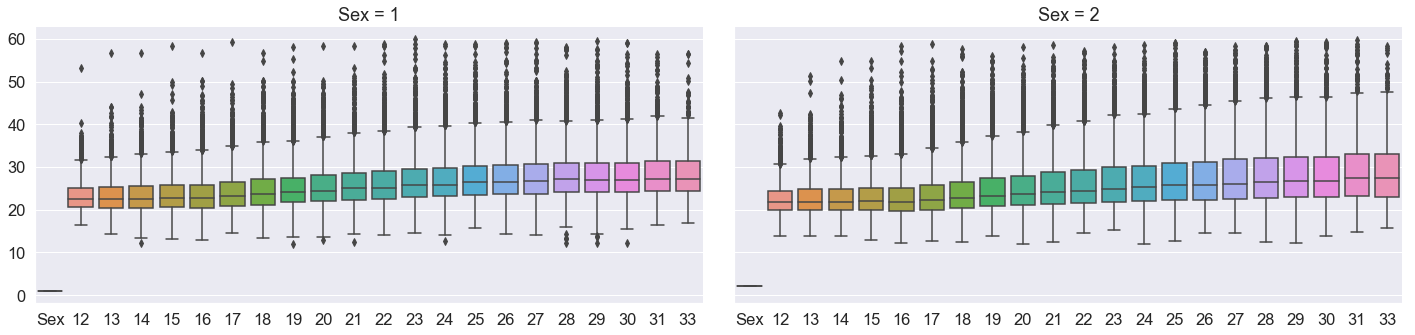

In [265]:
#Gender differences in the trends of BMI increase
df1 = nlsy.loc[:, '12':'33']
df2 = nlsy.loc[:, 'Sex':'Sex']
#print(df2)
frames = [df2, df1]
#frames
df3 = pd.concat(frames, axis=1)
sns.catplot(col="Sex", aspect=2,height=5, kind="box", data=df3);

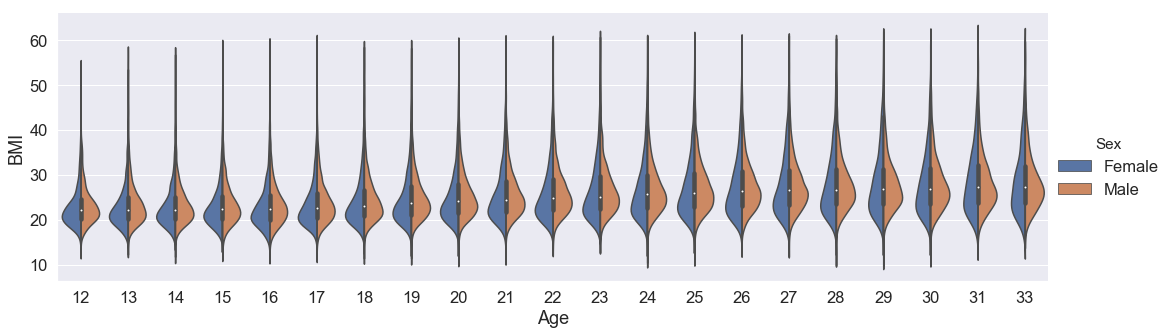

In [266]:
#Gender differences in the trends of BMI increase
sns.catplot(x="Age", y="BMI", hue="Sex", height=5, aspect=3,
            kind="violin", split=True, data=dflong);

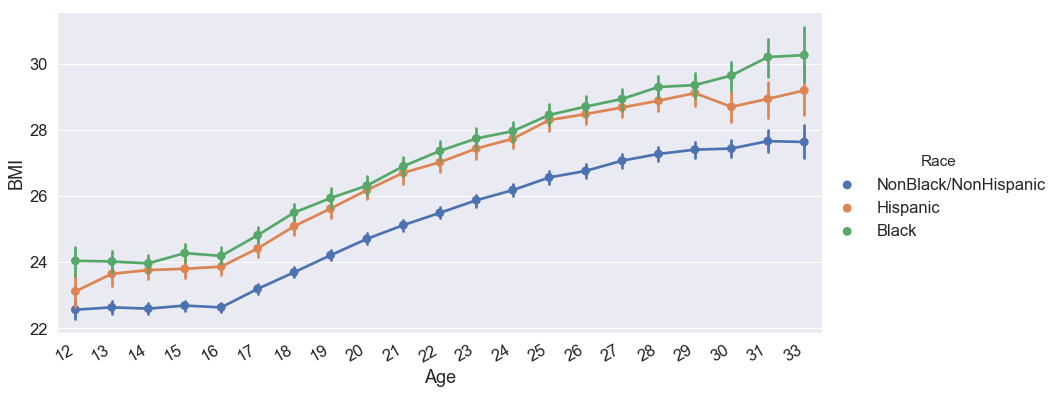

In [267]:
#Race differences in the trends of BMI increase
ax = sns.catplot(x='Age',y='BMI',hue='Race',kind='point',height=6, aspect=2, data=dflong)
ax.fig.autofmt_xdate()

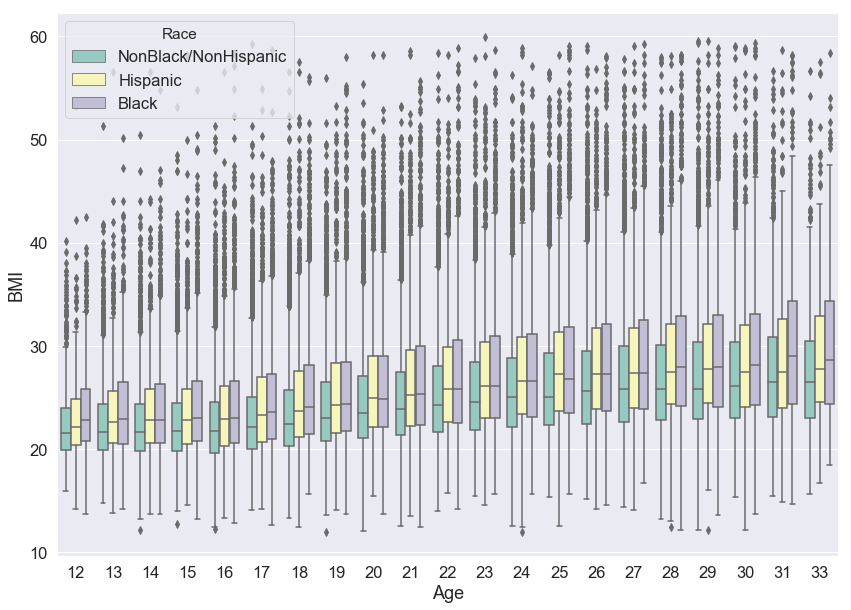

In [268]:
#Race differences in the trends of BMI increase
plt.subplots(figsize=(14,10))
ax = sns.boxplot(x="Age", y="BMI", hue="Race",
               data=dflong, palette="Set3")

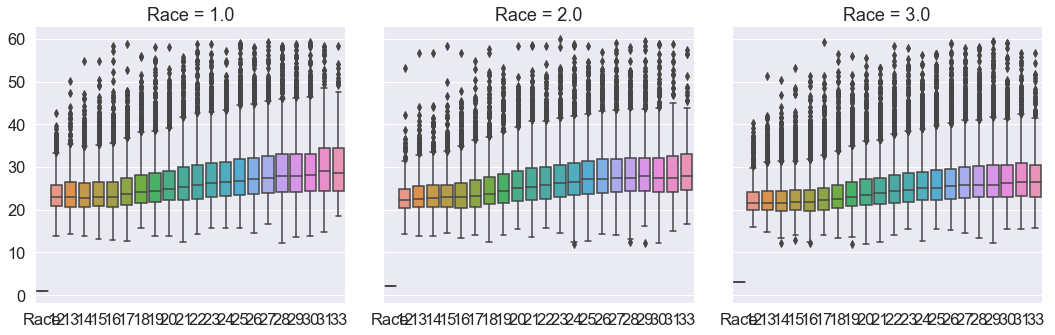

In [269]:
#Race differences in the trends of BMI increase
df4 = nlsy.loc[:, 'Race':'33']
sns.catplot(col="Race", aspect=1,height=5, kind="box", data=df4);

12 32.114999999999995 27.26 18.02
13 32.19999999999997 27.369999999999997 17.858000000000004
14 31.93 27.443 17.888
15 32.5625 27.6 17.72
16 32.981999999999985 27.803000000000004 17.23
17 33.91 28.75 18.01
18 34.97 29.501000000000005 18.31
          12      13      14       15      16     17      18
0.95  32.115    32.2   31.93  32.5625  32.982  33.91   34.97
0.85   27.26   27.37  27.443     27.6  27.803  28.75  29.501
0.05   18.02  17.858  17.888    17.72   17.23  18.01   18.31


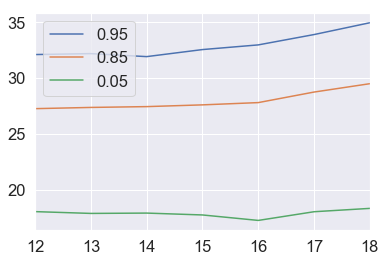

In [270]:
# quantile for overall
test = pd.DataFrame(index = ['0.95', '0.85', '0.05'], columns = nlsy.columns[3:10])
#print(test)
for age in nlsy.columns[3:10]:
    #print(age)
    tmp = nlsy[age].quantile(0.95)
    tmp2 = nlsy[age].quantile(0.85)
    tmp3 = nlsy[age].quantile(0.05)
    print(age, tmp, tmp2, tmp3)
    test.loc['0.95'][age] = tmp
    test.loc['0.85'][age] = tmp2
    test.loc['0.05'][age] = tmp3
    #test.append(tmp)
print(test)
test.T.plot()
#nlsy['Age12'].quantile(0.97)

       12   13   14   15   16   17   18
0.95  NaN  NaN  NaN  NaN  NaN  NaN  NaN
0.85  NaN  NaN  NaN  NaN  NaN  NaN  NaN
0.05  NaN  NaN  NaN  NaN  NaN  NaN  NaN
          12      13       14     15      16      17      18
0.95  32.243  31.974   31.768  32.08   32.98  33.772   34.44
0.85  27.339   27.44    27.46  27.89   27.98   28.89  29.382
0.05  18.158   18.26  18.1385  17.75  17.485  18.178  18.716


Text(0, 0.5, 'BMI')

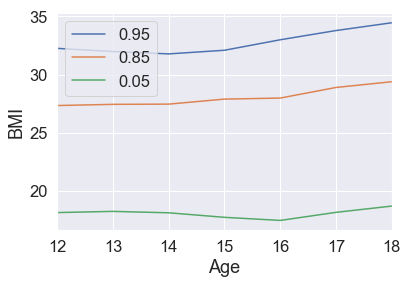

In [271]:
#quantile for male
test = pd.DataFrame(index = ['0.95', '0.85', '0.05'], columns = nlsy.columns[3:10])
print(test)
for age in nlsy.columns[3:10]:
    #print(age)
    male = nlsy.loc[nlsy['Sex']==1]
    #print(male)
    male9ile = male[age].quantile(0.95)
    male8ile = male[age].quantile(0.85)
    male7ile = male[age].quantile(0.05)
    #print(age, tmp, tmp2, tmp3)
    test.loc['0.95'][age] = male9ile
    test.loc['0.85'][age] = male8ile
    test.loc['0.05'][age] = male7ile
    #test.append(tmp)
print(test)
test.T.plot()
plt.xlabel('Age')
plt.ylabel('BMI')


       12   13   14   15   16   17   18
0.95  NaN  NaN  NaN  NaN  NaN  NaN  NaN
0.85  NaN  NaN  NaN  NaN  NaN  NaN  NaN
0.05  NaN  NaN  NaN  NaN  NaN  NaN  NaN
          12      13      14      15      16     17     18
0.95  32.092  32.385  32.232   32.92  33.099  34.33  35.73
0.85   26.63  27.215   27.44  27.442   27.46  28.34  29.53
0.05   18.01  17.545   17.71   17.71   17.01  17.94  18.02


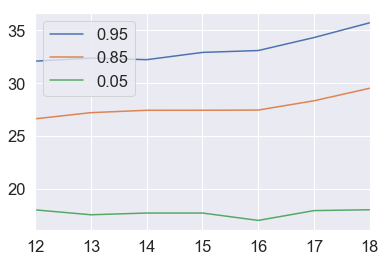

In [272]:
#quantile for female
test = pd.DataFrame(index = ['0.95', '0.85', '0.05'], columns = nlsy.columns[3:10])
print(test)
for age in nlsy.columns[3:10]:
    #print(age)
    male = nlsy.loc[nlsy['Sex']==2]
    #print(male)
    male9ile = male[age].quantile(0.95)
    male8ile = male[age].quantile(0.85)
    male7ile = male[age].quantile(0.05)
    #print(age, tmp, tmp2, tmp3)
    test.loc['0.95'][age] = male9ile
    test.loc['0.85'][age] = male8ile
    test.loc['0.05'][age] = male7ile
    #test.append(tmp)
print(test)
test.T.plot()

In [273]:
# subset data and pick the year of 25
df6 = nlsy.loc[:, '25':'25']
df5 = nlsy.loc[:, 'Sex':'Race']
#print(df2)
frames = [df5, df6]
#frames
df4 = pd.concat(frames, axis=1)
df4.dropna()
df4.describe()
df4['Sex'][df4['Sex']==1] = 'Male'

df4['Sex'][df4['Sex']==2] = 'Female'

df4['Race'][df4['Race']==1] = 'Black'

df4['Race'][df4['Race']==2] = 'Hispanic'

df4['Race'][df4['Race']==3] = 'NonBlack/NonHispanic'
print(df4)

         Sex                  Race     25
0     Female  NonBlack/NonHispanic  24.75
1       Male              Hispanic  27.41
2     Female              Hispanic    NaN
3     Female              Hispanic  32.01
4       Male              Hispanic  26.63
5     Female              Hispanic  33.30
6       Male              Hispanic    NaN
7     Female  NonBlack/NonHispanic  22.81
8       Male  NonBlack/NonHispanic  25.80
9       Male  NonBlack/NonHispanic  18.99
10    Female              Hispanic  30.65
11      Male              Hispanic  29.29
12      Male              Hispanic  21.63
13      Male              Hispanic    NaN
14    Female              Hispanic    NaN
15      Male              Hispanic  28.25
16    Female              Hispanic    NaN
17      Male                 Black  22.81
18      Male                 Black  22.60
19      Male                 Black    NaN
20      Male              Hispanic  24.41
21      Male              Hispanic    NaN
22    Female              Hispanic

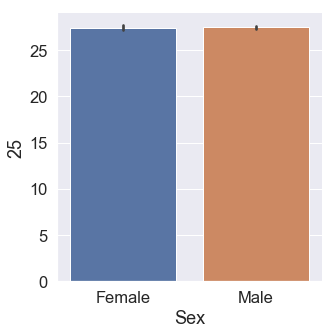

In [274]:
sns.catplot(x="Sex",y="25",kind='bar',data=df4)

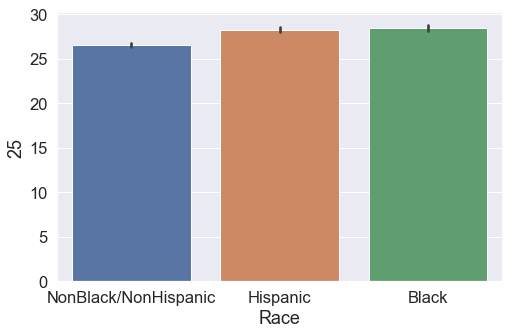

In [275]:
sns.catplot(x="Race",y="25",kind='bar',aspect=1.5,height=5,data=df4)

In [276]:
df4['GroupBy'] = 'NaN'
df4['GroupBy'][df4['25'] > 40] = 'severe'
df4['GroupBy'][(df4['25'] > 30) & (df4['25'] <= 40)] = 'overweight'
df4['GroupBy'][(df4['25'] > 25) & (df4['25'] <= 30)] = 'atRisk'
df4['GroupBy'][(df4['25'] <= 25)] = 'normal'
print(df4)

         Sex                  Race     25     GroupBy
0     Female  NonBlack/NonHispanic  24.75      normal
1       Male              Hispanic  27.41      atRisk
2     Female              Hispanic    NaN         NaN
3     Female              Hispanic  32.01  overweight
4       Male              Hispanic  26.63      atRisk
5     Female              Hispanic  33.30  overweight
6       Male              Hispanic    NaN         NaN
7     Female  NonBlack/NonHispanic  22.81      normal
8       Male  NonBlack/NonHispanic  25.80      atRisk
9       Male  NonBlack/NonHispanic  18.99      normal
10    Female              Hispanic  30.65  overweight
11      Male              Hispanic  29.29      atRisk
12      Male              Hispanic  21.63      normal
13      Male              Hispanic    NaN         NaN
14    Female              Hispanic    NaN         NaN
15      Male              Hispanic  28.25      atRisk
16    Female              Hispanic    NaN         NaN
17      Male                

In [277]:
df7 = df4.loc[:, 'GroupBy':'GroupBy']
df8 = df4.loc[:, 'Sex':'Race']
frames = [df7, df8]

df9 = pd.concat(frames, axis=1)
print(df9)

         GroupBy     Sex                  Race
0         normal  Female  NonBlack/NonHispanic
1         atRisk    Male              Hispanic
2            NaN  Female              Hispanic
3     overweight  Female              Hispanic
4         atRisk    Male              Hispanic
5     overweight  Female              Hispanic
6            NaN    Male              Hispanic
7         normal  Female  NonBlack/NonHispanic
8         atRisk    Male  NonBlack/NonHispanic
9         normal    Male  NonBlack/NonHispanic
10    overweight  Female              Hispanic
11        atRisk    Male              Hispanic
12        normal    Male              Hispanic
13           NaN    Male              Hispanic
14           NaN  Female              Hispanic
15        atRisk    Male              Hispanic
16           NaN  Female              Hispanic
17        normal    Male                 Black
18        normal    Male                 Black
19           NaN    Male                 Black
20        nor

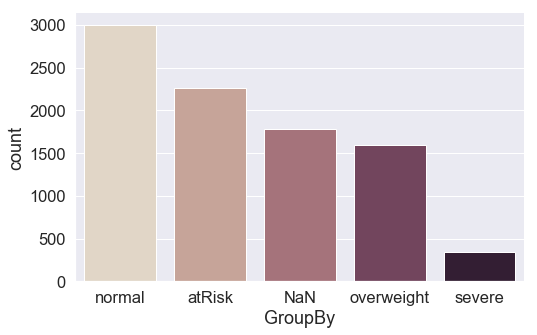

In [278]:
sns.catplot(x="GroupBy", kind="count", palette="ch:.25", aspect=1.5,height=5,data=df9);

In [279]:
pd.crosstab(index=df9["GroupBy"], columns="count")

col_0,count
GroupBy,
NaN,1785
atRisk,2265
normal,2994
overweight,1595
severe,345


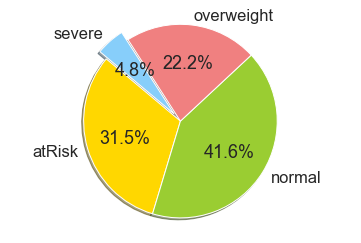

In [280]:
# Data to plot
labels = 'atRisk', 'normal', 'overweight', 'severe'
sizes = [2265, 2994, 1595, 345]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

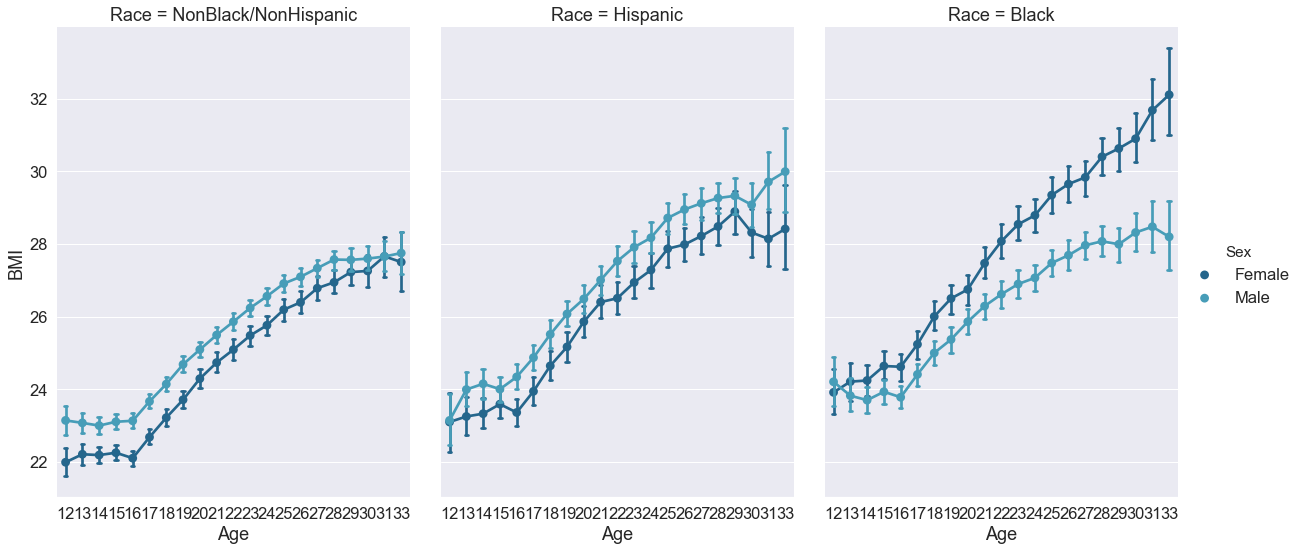

In [281]:
#Trends in BMI by Sex and Race 

g = sns.catplot(x="Age", y="BMI", hue="Sex", col="Race",
                capsize=.2, palette="YlGnBu_d", height=8, aspect=0.7,
                kind="point", data=dflong)
g.despine(left=True)

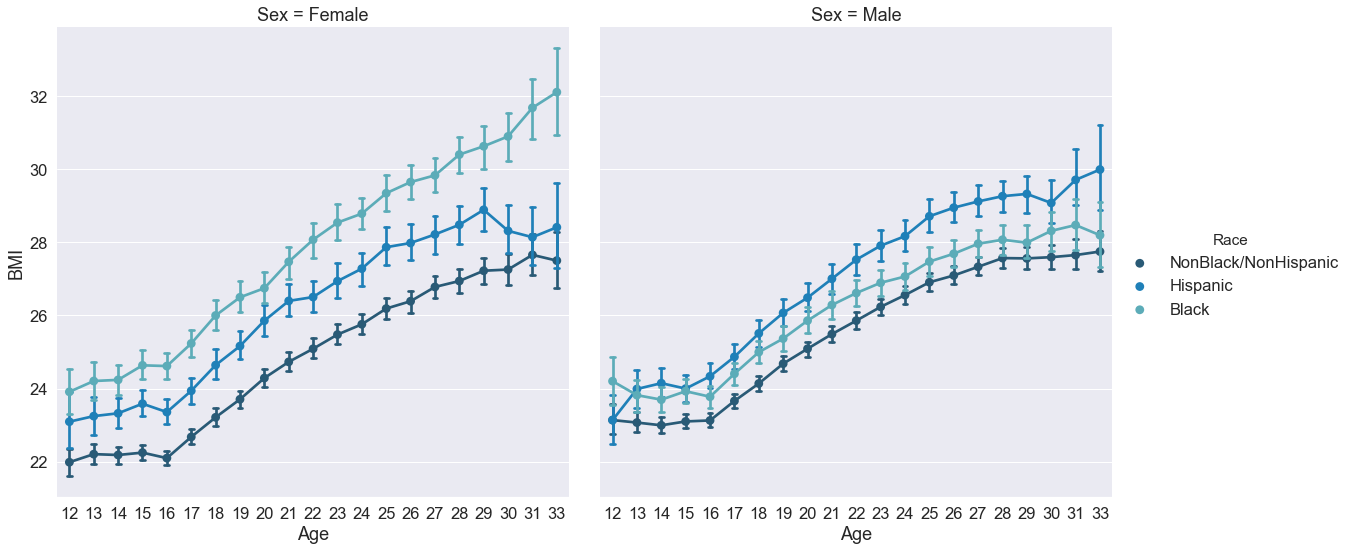

In [282]:
#Trends in BMI by Sex and Race 
g = sns.catplot(x="Age", y="BMI", hue="Race", col="Sex",
                capsize=.2, palette="YlGnBu_d", height=8, aspect=1,
                kind="point", data=dflong)
g.despine(left=True)

In [283]:
#Two-ways ANOVA 

lm = ols('BMI ~ C(Sex)*C(Race)', data=dflong).fit()
table = sm.stats.anova_lm(lm, typ=2) 
print(table)

                      sum_sq        df            F         PR(>F)
C(Sex)          8.204196e+02       1.0    22.234536   2.415591e-06
C(Race)         8.573603e+04       2.0  1161.784025   0.000000e+00
C(Sex):C(Race)  3.147352e+04       2.0   426.488526  2.627080e-185
Residual        4.525667e+06  122652.0          NaN            NaN


In [284]:
#Thank you!